In [1]:
from pydub import AudioSegment
from pydub.utils import mediainfo
from glob import glob
import h5py
import numpy as np
import os

In [2]:
dirs = glob('../fma_small/*')
dirs = dirs[:2]
dirs = [str(dirs[i]) + str('/*.mp3') for i in range(len(dirs))]
dirs = [glob(dirs[i]) for i in range(len(dirs))]
path = []
for i in range(len(dirs)):
    path += dirs[i]

In [3]:
file = h5py.File("small.hdf5", "w")

In [ ]:
Fs = 14700
LENGTH = int(1.5*Fs)
INPUT_LEN = 30*Fs
INTERVAL = int(0.05*Fs) #in seconds, determines how many fingerprints each song will generate

for i in range(len(path)):
    label = int(path[i][17:23])
    music = AudioSegment.from_file(path[i])
    temp = np.array(music.get_array_of_samples())
    
    # check if the audio has two channels
    if len(temp) > INPUT_LEN: 
        temp = [temp[j] for j in range(0,len(temp),2)] #get left channel only
            
    # downsample by factor of 3
    temp = [temp[j] for j in range(0,len(temp),3)]
    
    # convert to fingerprints
    cur_data = []
    num_fp = int((len(temp)-LENGTH)/INTERVAL)+1
    for j in range(num_fp):
        segment = temp[j*INTERVAL:j*INTERVAL+LENGTH]
        segment = np.asarray(segment)          
        cur_data.append(segment)
        
    cur_data = np.asarray(cur_data)
    cur_data = cur_data.astype(np.float32)
    cur_data = cur_data/np.amax(cur_data)
    dset = file.create_dataset(str(label), data=cur_data)
    print('current song num: '+str(dset.name)+'num music: '+str(i))
    

(570, 22050)
(571, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(571, 22050)
(571, 22050)
(570, 22050)
(571, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(571, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(571, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(571, 22050)
(570, 22050)
(570, 22050)
(571, 22050)
(271, 22050)
(270, 22050)
(570, 22050)
(570, 22050)
(570, 22050)
(570, 22050)


epoch num: 0
epoch num: 10


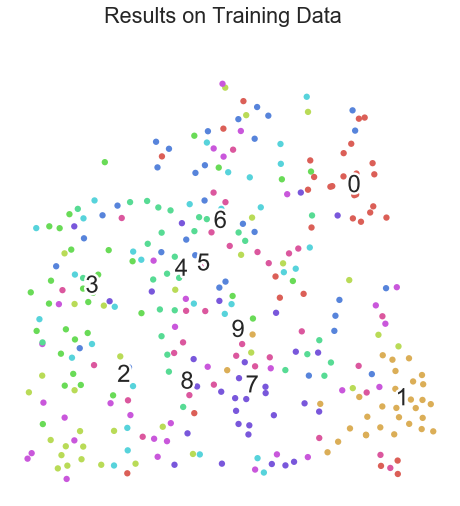

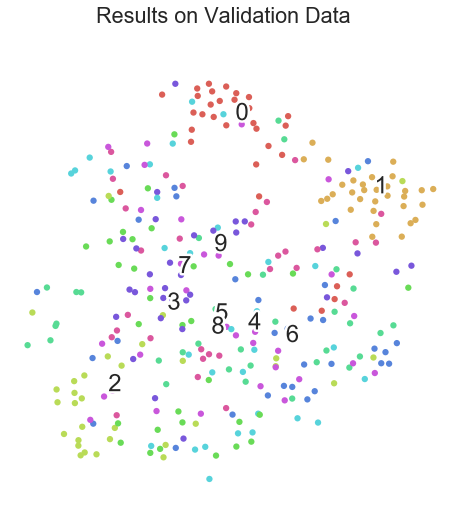

In [14]:
file.close()

In [31]:
f = h5py.File("small.hdf5", "r")
for label in f:
    print(f[label])